Epoch 1/50


C:\Users\srdee\anaconda3\envs\py\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0176 - loss: 4.3560
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0450 - loss: 4.3435
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0450 - loss: 4.3298
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0763 - loss: 4.3024
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0274 - loss: 4.2603
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0059 - loss: 4.1954    
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0568 - loss: 4.1730
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0685 - loss: 4.0696
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1174 - loss: 4.0717
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0646 - loss: 3.9888
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0920 - loss: 3.8705
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1037 - loss: 3.7871
Epoch 13

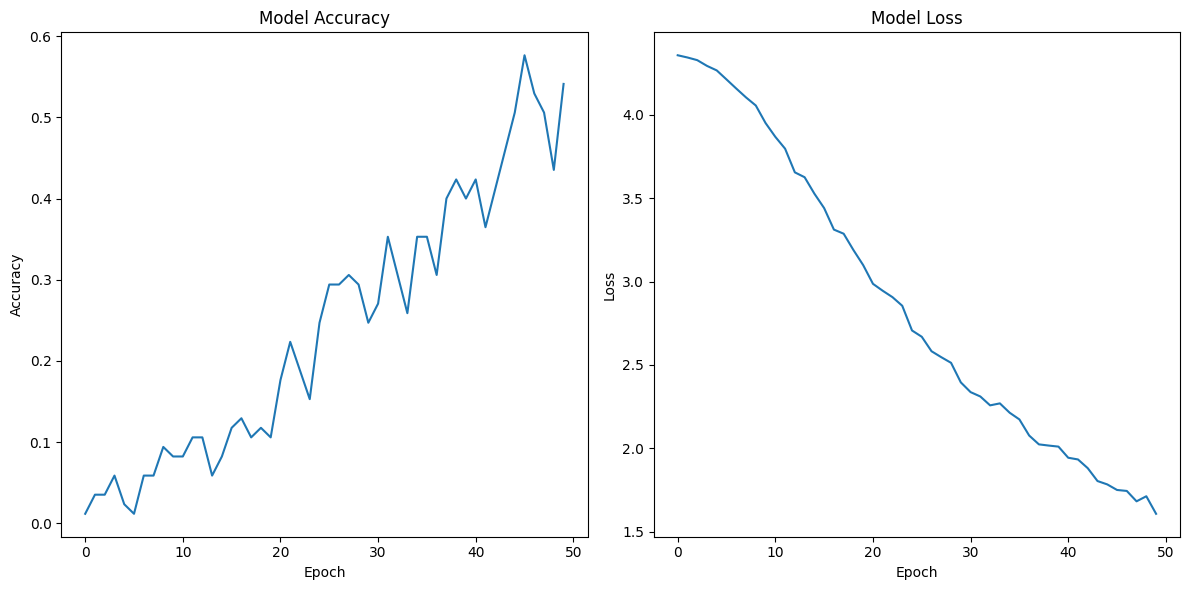

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

with open('sample1.txt', 'r') as file:
    lines = file.read().lower().split('\n')[:5000]

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(lines)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in lines:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i + 1])

max_seq_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

X, y = input_sequences[:, :-1], to_categorical(input_sequences[:, -1], num_classes=total_words)

model = Sequential([
    Embedding(total_words, 100, input_length=max_seq_len - 1),
    LSTM(150),
    Dropout(0.2),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=50, verbose=1)

def generate_text(seed_text, next_words, model, max_seq_len):
    for _ in range(next_words):
        token_list = pad_sequences([tokenizer.texts_to_sequences([seed_text])[0]], maxlen=max_seq_len - 1, padding='pre')
        predicted_word = tokenizer.index_word.get(np.argmax(model.predict(token_list, verbose=0)), '')
        seed_text += f" {predicted_word}"
    return seed_text.strip()

print(generate_text("your seed text", 10, model, max_seq_len))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()
